In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
train_data = pd.read_csv('mnist_train.csv')
train_data = np.array(train_data)
test_data = pd.read_csv('mnist_test.csv')
test_data = np.array(test_data)

train_data = train_data.T
test_data = test_data.T

In [50]:
m, n = train_data.shape

Y_train = train_data[0]
X_train = train_data[1:] / 255

Y_test = test_data[0]
X_test = test_data[1:] / 255

In [66]:
def init_params():
    weight_1 = np.random.randn(10, 784) * 0.01
    bias_1 = np.random.rand(10, 1) - 0.5
    weight_2 = np.random.rand(10, 10) - 0.5
    bias_2 = np.random.rand(10, 1) - 0.5
    return weight_1, bias_1, weight_2, bias_2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def forward_pass(weight_1, bias_1, weight_2, bias_2, X):
    Z_1 = weight_1.dot(X) + bias_1
    A_1 = ReLU(Z_1)
    Z_2 = weight_2.dot(A_1) + bias_2
    A_2 = softmax(Z_2)
    return Z_1, A_1, Z_2, A_2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return (Z > 0).astype(float)

def backwards_pass(Z_1, A_1, Z_2, A_2, weight_1, weight_2, X, Y):
    one_hot_Y = one_hot(Y)
    der_Z_2 = A_2 - one_hot_Y
    der_weight_2 = 1 / m * der_Z_2.dot(A_1.T)
    der_bias_2 = 1 / m * np.sum(der_Z_2, axis=1, keepdims=True)
    der_Z_1 = weight_2.T.dot(der_Z_2) * deriv_ReLU(Z_1)
    der_weight_1 = 1 / m * der_Z_1.dot(X.T)
    der_bias_1 = 1 / m * np.sum(der_Z_1, axis=1, keepdims=True)
    return der_weight_1, der_bias_1, der_weight_2, der_bias_2

def update_params(weight_1, bias_1, weight_2, bias_2, der_weight_1, der_bias_1, der_weight_2, der_bias_2, rate):
    weight_1 = weight_1 - rate * der_weight_1
    bias_1 = bias_1 - rate * der_bias_1
    weight_2 = weight_2 - rate * der_weight_2
    bias_2 = bias_2 - rate * der_bias_2
    return weight_1, bias_1, weight_2, bias_2

In [67]:
def predictions(A_2):
    return np.argmax(A_2, 0)

def accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, learning_rate, epochs):
    weight_1, bias_1, weight_2, bias_2 = init_params()
    eps = []
    accs = []
    for e in range(epochs):
        Z_1, A_1, Z_2, A_2 = forward_pass(weight_1, bias_1, weight_2, bias_2, X)
        der_weight_1, der_bias_1, der_weight_2, der_bias_2 = backwards_pass(Z_1, A_1, Z_2, A_2, weight_1, weight_2, X, Y)
        weight_1, bias_1, weight_2, bias_2 = update_params(weight_1, bias_1, weight_2, bias_2, der_weight_1, der_bias_1, der_weight_2, der_bias_2, learning_rate)
        if e % 10 == 0:
            print("Epoch: ", e)
            acc = accuracy(predictions(A_2), Y)
            print("Accuracy: ", acc)
            eps += [e]
            accs += [acc]
    return weight_1, bias_1, weight_2, bias_2, eps, accs

In [69]:
epochs = 500
learning_rate = 0.01

weight_1, bias_1, weight_2, bias_2, eps, accs = gradient_descent(X_train, Y_train, learning_rate, epochs)

Epoch:  0
[7 5 7 ... 7 7 5] [5 0 4 ... 5 6 8]
Accuracy:  0.08673333333333333
Epoch:  10
[0 0 6 ... 0 6 0] [5 0 4 ... 5 6 8]
Accuracy:  0.24306666666666665
Epoch:  20
[0 0 4 ... 0 9 0] [5 0 4 ... 5 6 8]
Accuracy:  0.5240833333333333
Epoch:  30
[3 0 4 ... 3 6 0] [5 0 4 ... 5 6 8]
Accuracy:  0.6697333333333333
Epoch:  40
[8 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.7071833333333334
Epoch:  50
[5 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.8272666666666667
Epoch:  60
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.8426833333333333
Epoch:  70
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.8468166666666667
Epoch:  80
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.8315166666666667
Epoch:  90
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.8625833333333334
Epoch:  100
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.8550833333333333
Epoch:  110
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.8770833333333333
Epoch:  120
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.8868
Epoch: 

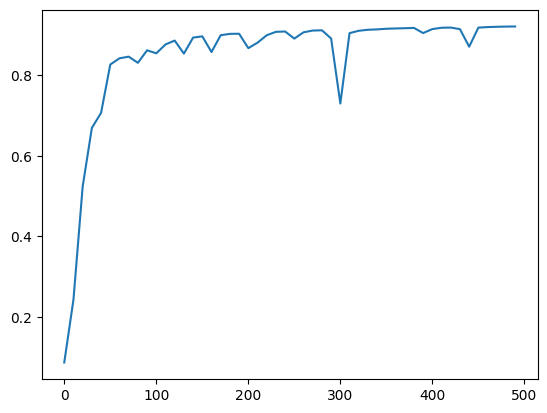

In [70]:
plt.plot(eps, accs)
plt.show()

In [71]:
def predict(X, weight_1, bias_1, weight_2, bias_2):
    _, _, _, A_2 = forward_pass(weight_1, bias_1, weight_2, bias_2, X)
    preds = predictions(A_2)
    return preds

preds = predict(X_test, weight_1, bias_1, weight_2, bias_2)
accuracy(preds, Y_test)

[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]


0.9236